In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.lines as mlines
import numpy as np
import requests
from pprint import pprint

In [3]:
# File to Load
homelesscount_data = 'homeless_count2018.csv'
clean_census_data = 'clean_census_data.csv'
bedcount_data = 'HIC_bedcount.csv'

In [4]:
# Reading the homeless_count2018 Data
homelesscount_data_df = pd.read_csv(homelesscount_data)
clean_census_data_df = pd.read_csv(clean_census_data)
bedcount_data_df = pd.read_csv(bedcount_data)

In [5]:
# Combining the data into a single dataset
combined_census_homelesscount_df = pd.merge(clean_census_data_df, homelesscount_data_df, on='State')

combined_census_homelesscount_df.head()

combined_census_homelesscount_bed_df = pd.merge(combined_census_homelesscount_df, bedcount_data_df, on= 'State')

combined_census_homelesscount_bed_df.head()

,State,NAME,POP_ESTIMATE_2018,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
0,NE,Northeast Region,56111079,3,"2,421","1,736",541,0,"2,277",144,...,273,273,114,41.76%,28,75,198,0,51,0
1,NE,Nebraska,1929268,3,"2,421","1,736",541,0,"2,277",144,...,273,273,114,41.76%,28,75,198,0,51,0
2,AL,Alabama,4887871,8,"3,434","1,519",865,40,"2,424","1,010",...,0,0,0,0.00%,0,0,0,0,0,0
3,AK,Alaska,737438,2,"2,016","1,248",459,0,"1,707",309,...,71,71,71,100.00%,0,0,71,0,0,0
4,AZ,Arizona,7171646,3,"9,865","3,615","2,144",40,"5,799","4,066",...,1086,1086,1086,100.00%,259,901,185,0,29,10


In [6]:
# Set new index to name
df = combined_census_homelesscount_bed_df.set_index("NAME")
df.head()

,State,POP_ESTIMATE_2018,Number of CoCs,"Overall Homeless, 2018","Sheltered ES Homeless, 2018","Sheltered TH Homeless, 2018","Sheltered SH Homeless, 2018","Sheltered Total Homeless, 2018","Unsheltered Homeless, 2018","Homeless Individuals, 2018",...,Total Year-Round Beds (OPH),Total Non-DV Year-Round Beds (OPH),Total HMIS Year-Round Beds (OPH),HMIS Participation Rate for Year-Round Beds (OPH),Total Units for Households with Children (OPH),Total Beds for Households with Children (OPH),Total Beds for Households without Children (OPH),Total Beds for Households with only Children (OPH),Dedicated Veteran Beds (OPH),Dedicated Youth Beds (OPH)
NAME,,,,,,,,,,,,,,,,,,,,,
Northeast Region,NE,56111079,3,"2,421","1,736",541,0,"2,277",144,"1,745",...,273,273,114,41.76%,28,75,198,0,51,0
Nebraska,NE,1929268,3,"2,421","1,736",541,0,"2,277",144,"1,745",...,273,273,114,41.76%,28,75,198,0,51,0
Alabama,AL,4887871,8,"3,434","1,519",865,40,"2,424","1,010","2,570",...,0,0,0,0.00%,0,0,0,0,0,0
Alaska,AK,737438,2,"2,016","1,248",459,0,"1,707",309,"1,434",...,71,71,71,100.00%,0,0,71,0,0,0
Arizona,AZ,7171646,3,"9,865","3,615","2,144",40,"5,799","4,066","7,259",...,1086,1086,1086,100.00%,259,901,185,0,29,10


In [7]:
# Reorganizing the columns using double brackets
organized_df = df[["POP_ESTIMATE_2018", "Homeless Veterans, 2018","Homeless People in Families, 2018", "Homeless Unaccompanied Youth Under 18, 2018"]]
organized_df.head()

,POP_ESTIMATE_2018,"Homeless Veterans, 2018","Homeless People in Families, 2018","Homeless Unaccompanied Youth Under 18, 2018"
NAME,,,,
Northeast Region,56111079,171,676,14
Nebraska,1929268,171,676,14
Alabama,4887871,339,864,44
Alaska,737438,132,582,8
Arizona,7171646,893,"2,606",48


In [8]:
# Using .rename(columns={}) in order to rename columns
renamed_df = organized_df.rename(columns={"POP_ESTIMATE_2018":"Pop_2018", "Homeless Veterans, 2018":"Veterans", "Homeless People in Families, 2018":"Families", "Homeless Unaccompanied Youth Under 18, 2018":"Under 18" })
renamed_df.head()

,Pop_2018,Veterans,Families,Under 18
NAME,,,,
Northeast Region,56111079,171,676,14
Nebraska,1929268,171,676,14
Alabama,4887871,339,864,44
Alaska,737438,132,582,8
Arizona,7171646,893,"2,606",48


In [9]:
renamed_df = renamed_df.drop(["Northeast Region"], axis=0)
renamed_df.dtypes

Pop_2018     int64
Veterans    object
Families    object
Under 18    object
dtype: object

In [10]:
# Remove columns from the Veterans, Families, and Under 18 columns
renamed_df['Veterans'] = (renamed_df['Veterans']).str.replace(',','')
renamed_df['Families'] = (renamed_df['Families']).str.replace(',','')
renamed_df['Under 18'] = (renamed_df['Under 18']).str.replace(',','')
renamed_df.head(5)

,Pop_2018,Veterans,Families,Under 18
NAME,,,,
Nebraska,1929268,171,676,14
Alabama,4887871,339,864,44
Alaska,737438,132,582,8
Arizona,7171646,893,2606,48
Arkansas,3013825,251,432,43


In [11]:
# Use pd.to_numeric() method to convert the datatype of the Veterans, Families, and Under 18 columns
renamed_df['Veterans'] = pd.to_numeric(renamed_df['Veterans'])
renamed_df['Families'] = pd.to_numeric(renamed_df['Families'])
renamed_df['Under 18'] = pd.to_numeric(renamed_df['Under 18'])
renamed_df.dtypes

Pop_2018    int64
Veterans    int64
Families    int64
Under 18    int64
dtype: object

In [12]:
top_df = renamed_df.sort_values("Pop_2018",ascending=False)
top_df.head(10)

,Pop_2018,Veterans,Families,Under 18
NAME,,,,
California,39557045,10836,20964,1426
Texas,28701845,1935,6111,119
Florida,21299325,2543,9587,441
New York,19542209,1224,52070,122
Pennsylvania,12807060,982,5349,50
Illinois,12741080,804,3891,48
Ohio,11689442,749,3320,51
Georgia,10519475,705,2556,29
North Carolina,10383620,884,2817,43


In [13]:
top_df = top_df.reset_index()
top_df.head(10)

,NAME,Pop_2018,Veterans,Families,Under 18
0,California,39557045,10836,20964,1426
1,Texas,28701845,1935,6111,119
2,Florida,21299325,2543,9587,441
3,New York,19542209,1224,52070,122
4,Pennsylvania,12807060,982,5349,50
5,Illinois,12741080,804,3891,48
6,Ohio,11689442,749,3320,51
7,Georgia,10519475,705,2556,29
8,North Carolina,10383620,884,2817,43
9,Michigan,9995915,693,3142,96


In [14]:
top_df.dtypes

NAME        object
Pop_2018     int64
Veterans     int64
Families     int64
Under 18     int64
dtype: object

<function matplotlib.pyplot.show(*args, **kw)>

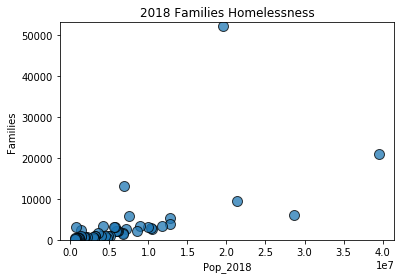

In [15]:
top_df = top_df.plot(kind='scatter', x='Pop_2018', y='Families', marker="o", edgecolors="black", 
                s = 100, alpha=0.75, title = '2018 Families Homelessness', ylim=(0,53000))

plt.show

In [16]:
plt.savefig("../project1_data/families_top_chart.png")
plt.show()

<Figure size 432x288 with 0 Axes>